In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style("darkgrid")

In [2]:
pd.set_option('display.max_rows', 500)

# **Análise descritiva de dados do desmatamento da Amazônia dos anos 2008-2021**

Os dados apresentados aqui foram extraidos da plataforma do Terrabrasilis do PRODES(http://terrabrasilis.dpi.inpe.br/), da database **Incremento anual no desmatamento - Shapefile (2008/2021)** , os dados foram tratados primeiramente no QGIS e depois exportados para o CSV e excluido algumas tabelas para melhor visualização para a proposta desta análise em questão.

A descrição da database completa pode ser acessada no seguinte site: http://terrabrasilis.dpi.inpe.br/geonetwork/srv/eng/catalog.search#/metadata/a5220c18-f7fa-4e3e-b39b-feeb3ccc4830

In [3]:
amazonia_df = pd.read_csv('..\Amazonia_Desmatamento\desmatamento_anual\desmatamento_anual.csv')

In [4]:
amazonia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629270 entries, 0 to 629269
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   state       629270 non-null  object 
 1   julian_day  629268 non-null  float64
 2   year        629270 non-null  int64  
 3   area_km     629270 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.2+ MB


In [5]:
amazonia_df[amazonia_df['julian_day'].isna()]

,state,julian_day,year,area_km
60620,MT,NaN,2019,0.002
288721,MT,NaN,2019,0.001


In [6]:
amazonia_df.dropna(axis = 0, inplace=True) #Fileiras com julian_day nulo são removidas

In [7]:
amazonia_df['Date'] = '' #Criando nova coluna para data

In [8]:
for i in amazonia_df: #Criação de um campo somando dias julianos e ano para conseguir os dias exatos de cada desmatamento
    for j in range(len(amazonia_df)):
        amazonia_df['Date'].values[j] = str(int(amazonia_df.julian_day.values[j]))+"_"+str(amazonia_df.year.values[j])
        

In [9]:
amazonia_df

,state,julian_day,year,area_km,Date
0,RR,240.0,2019,0.001,240_2019
1,AM,205.0,2016,2.564,205_2016
2,RO,213.0,2015,2.923,213_2015
3,PA,214.0,2015,0.001,214_2015
4,RR,263.0,2021,2.644,263_2021
...,...,...,...,...,...
629265,PA,199.0,2016,0.023,199_2016
629266,PA,199.0,2016,0.059,199_2016
629267,PA,201.0,2017,0.060,201_2017
629268,PA,196.0,2015,0.000,196_2015


In [10]:
amazonia_df['Date'] = pd.to_datetime(amazonia_df['Date'], format='%j_%Y')

In [11]:
amazonia_df #Dataset por dias, mês, ano

,state,julian_day,year,area_km,Date
0,RR,240.0,2019,0.001,2019-08-28
1,AM,205.0,2016,2.564,2016-07-23
2,RO,213.0,2015,2.923,2015-08-01
3,PA,214.0,2015,0.001,2015-08-02
4,RR,263.0,2021,2.644,2021-09-20
...,...,...,...,...,...
629265,PA,199.0,2016,0.023,2016-07-17
629266,PA,199.0,2016,0.059,2016-07-17
629267,PA,201.0,2017,0.060,2017-07-20
629268,PA,196.0,2015,0.000,2015-07-15


In [12]:
amazonia_ano_df= amazonia_df.groupby(['state',pd.Grouper(key='Date', freq='Y')]).sum().reset_index()

In [13]:
amazonia_ano_df.sort_values(by='Date', inplace = True)

In [14]:
#Exclusão de algumas colunas para melhor visualização
amazonia_ano_df.drop(labels = ['julian_day','year'], axis = 'columns', inplace=True)

In [15]:
#Dataset por ano, organizado.
amazonia_ano_df.reset_index(drop= True, inplace= True) 

In [16]:
#Formatação para 2 casas decimais
amazonia_ano_df['area_km']=amazonia_ano_df['area_km'].apply(lambda x: float("{:.2f}".format(x))) 

In [34]:
#Organizando a tabela Date para mostrar apenas os Anos
amazonia_ano_df['Date'] = amazonia_ano_df['Date'].dt.year

In [35]:
amazonia_ano_df

,state,Date,area_km
0,AC,2008,289.25
1,PA,2008,5637.68
2,MA,2008,1399.34
3,RO,2008,1086.20
4,MT,2008,3424.11
5,RR,2008,665.29
6,AM,2008,612.52
7,TO,2008,104.35
8,AP,2008,99.92
9,MT,2009,818.59


In [36]:
#Criando os dataframes para cada estado/ano
am_df = amazonia_ano_df[amazonia_ano_df.state == 'AM']
ac_df = amazonia_ano_df[amazonia_ano_df.state == 'AC']
ap_df = amazonia_ano_df[amazonia_ano_df.state == 'AP']
ma_df = amazonia_ano_df[amazonia_ano_df.state == 'MA']
mt_df = amazonia_ano_df[amazonia_ano_df.state == 'MT']
pa_df = amazonia_ano_df[amazonia_ano_df.state == 'PA']
ro_df = amazonia_ano_df[amazonia_ano_df.state == 'RO']
rr_df = amazonia_ano_df[amazonia_ano_df.state == 'RR']
to_df = amazonia_ano_df[amazonia_ano_df.state == 'TO']

## Gráficos por Estado/Ano de Desmatamento:

In [61]:
def plot_estados(dataframe,estado):
    plt.figure(figsize=(20, 10))
    plot = plt.bar(dataframe.Date,dataframe.area_km, color ='#BA0F30')
    plt.xticks(dataframe.Date)
    plt.title('ÁREA DESMATADA EM KM² DO ESTADO DO {}'.format(estado))
    plt.xlabel('Anos')
    plt.ylabel('DESMATAMENTO(KM²)');

    for i in plot.patches:
        plt.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va= 'baseline', fontsize = 12,
                color='black',xytext=(0,3),
                textcoords='offset points') 
    return 0

In [38]:
am_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 120
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    14 non-null     object 
 1   Date     14 non-null     int64  
 2   area_km  14 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 448.0+ bytes


0

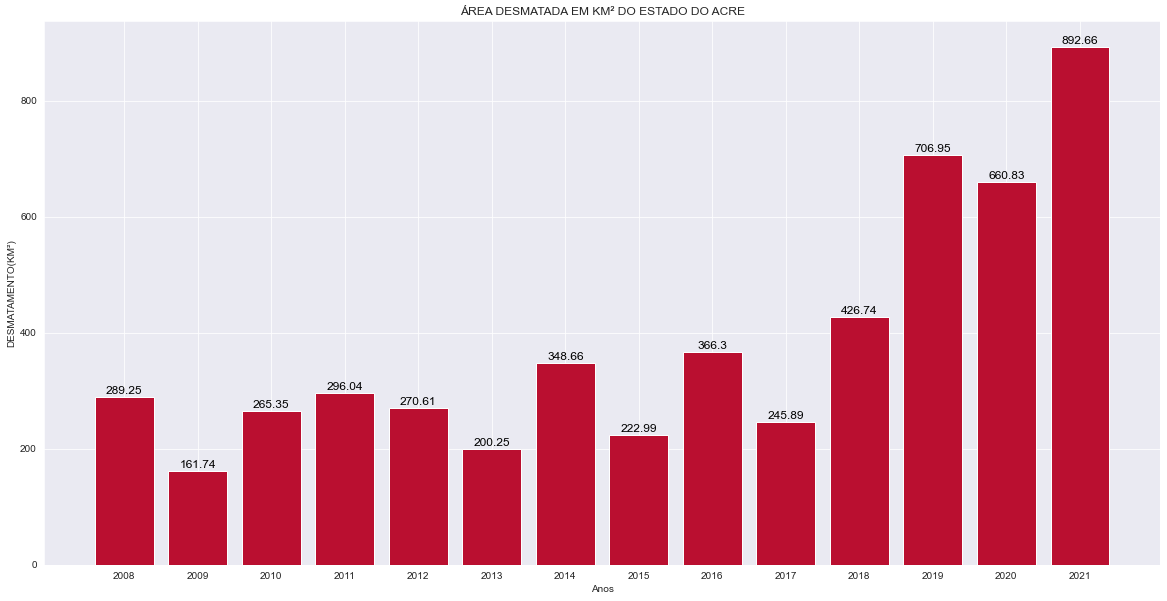

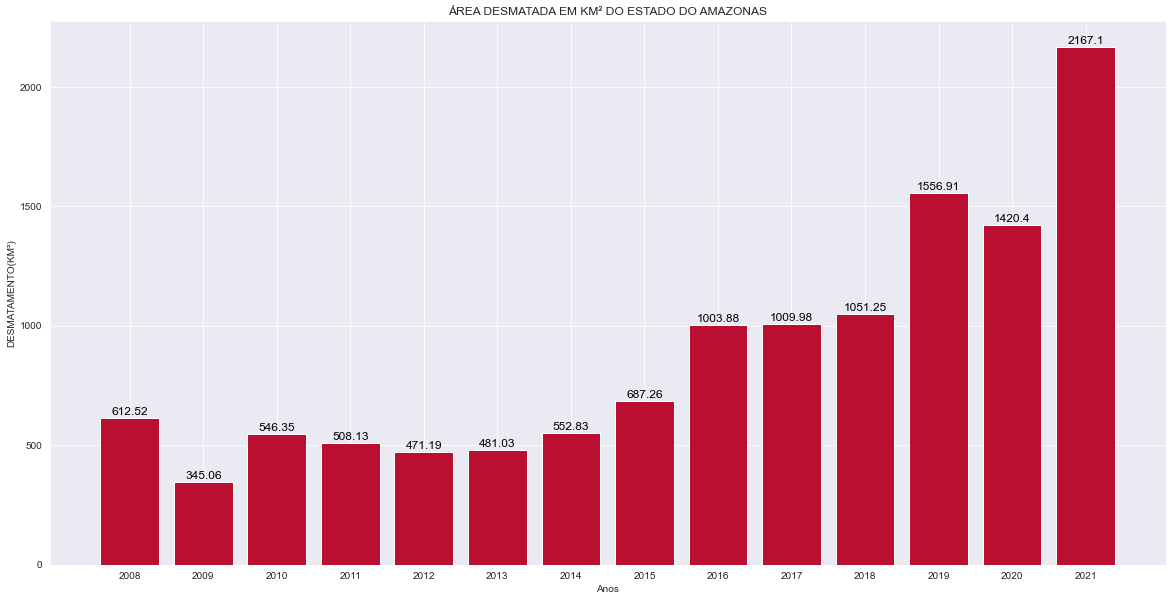

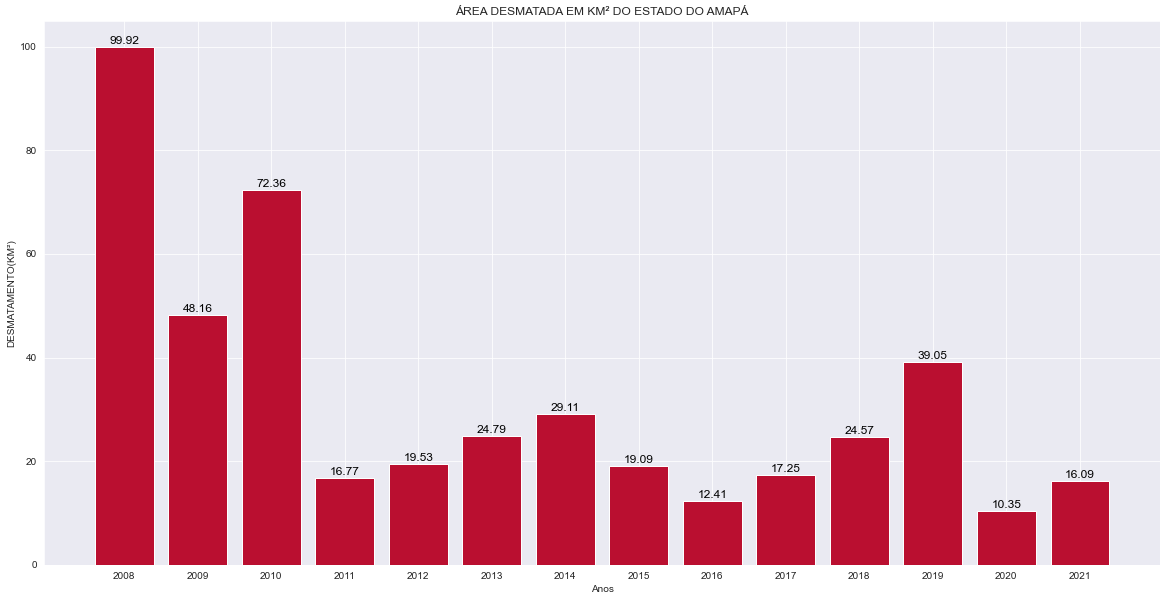

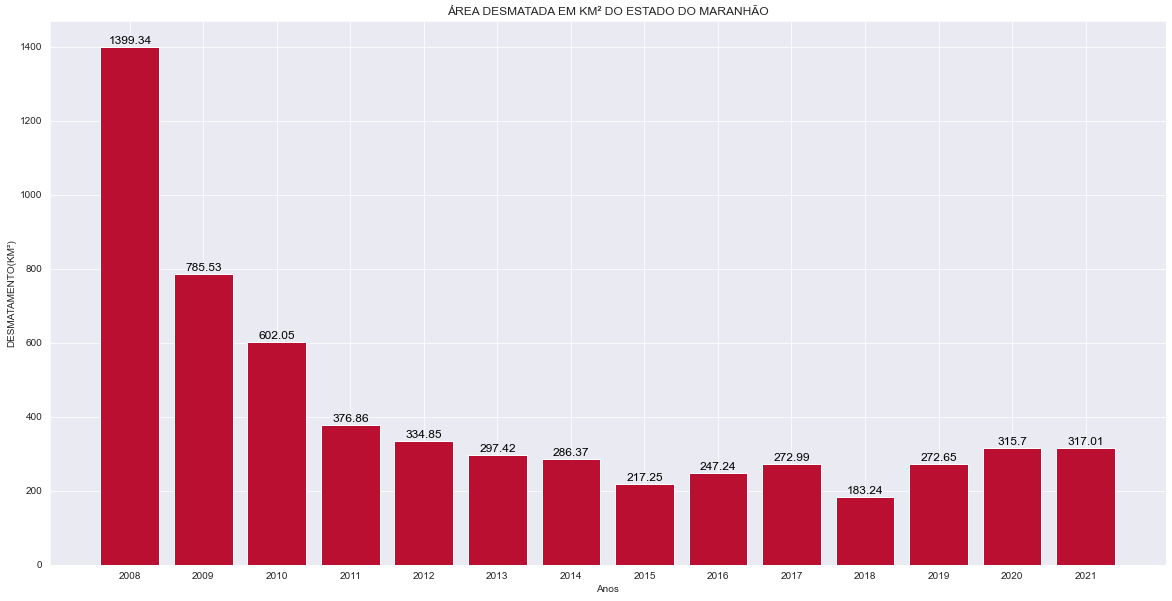

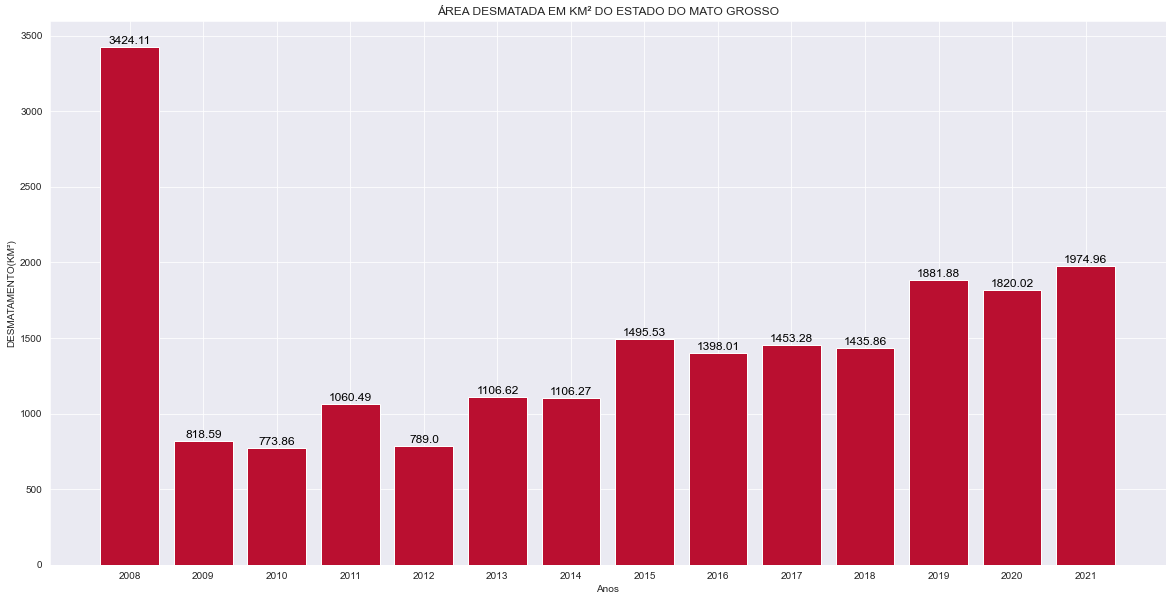

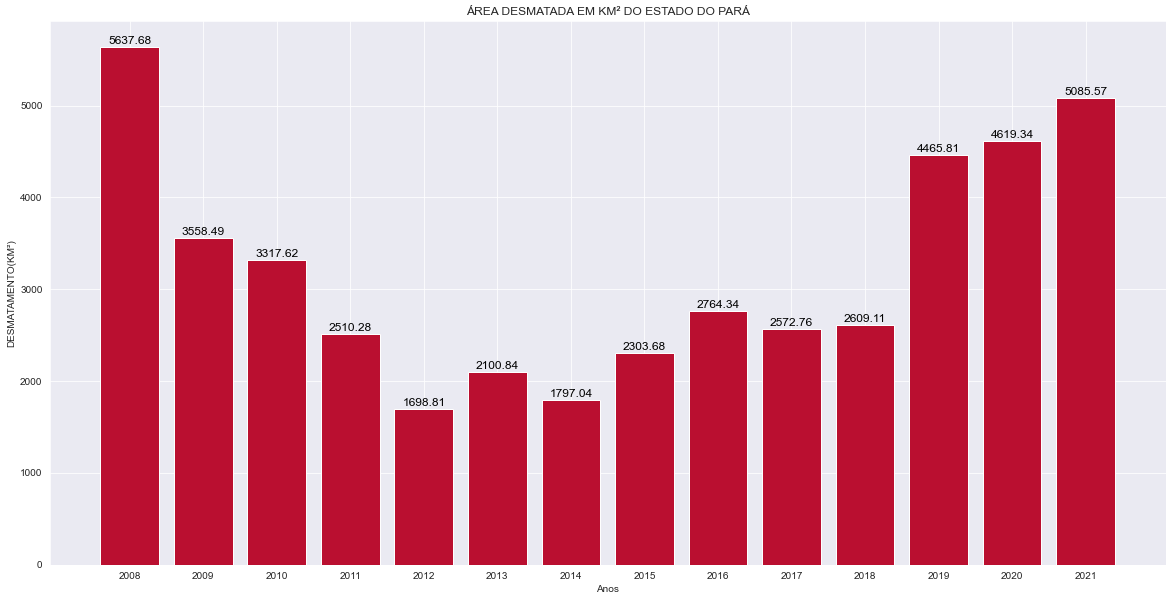

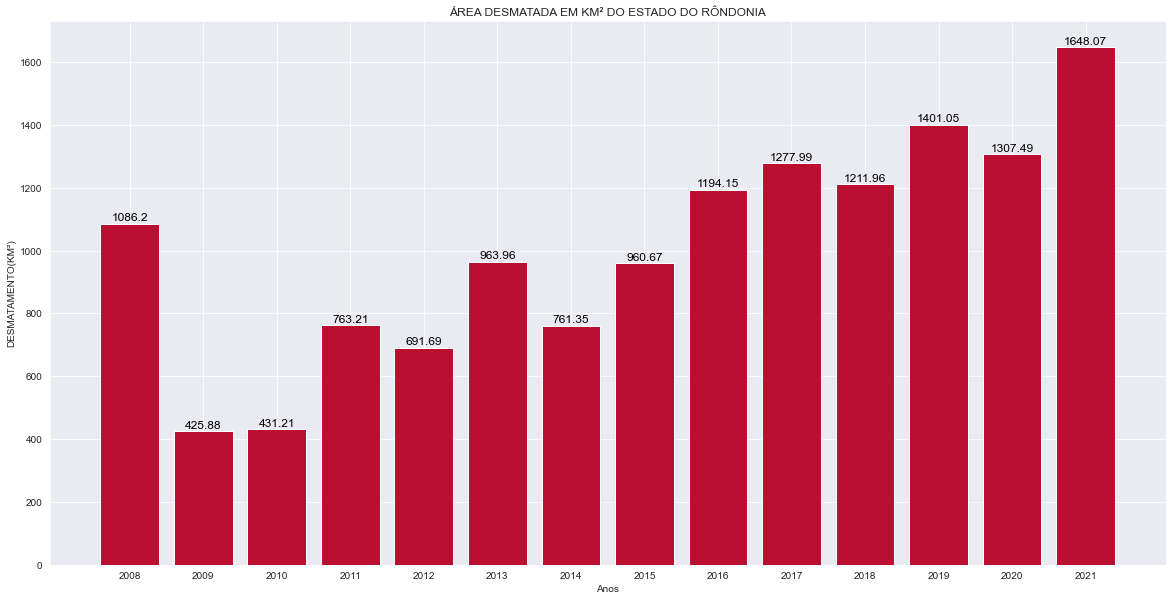

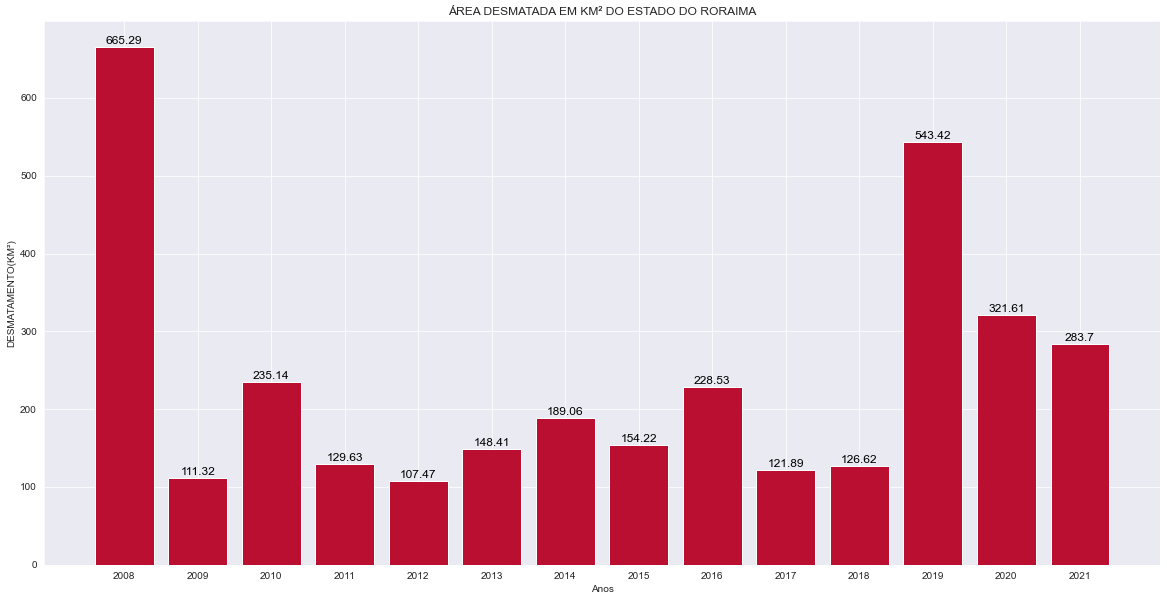

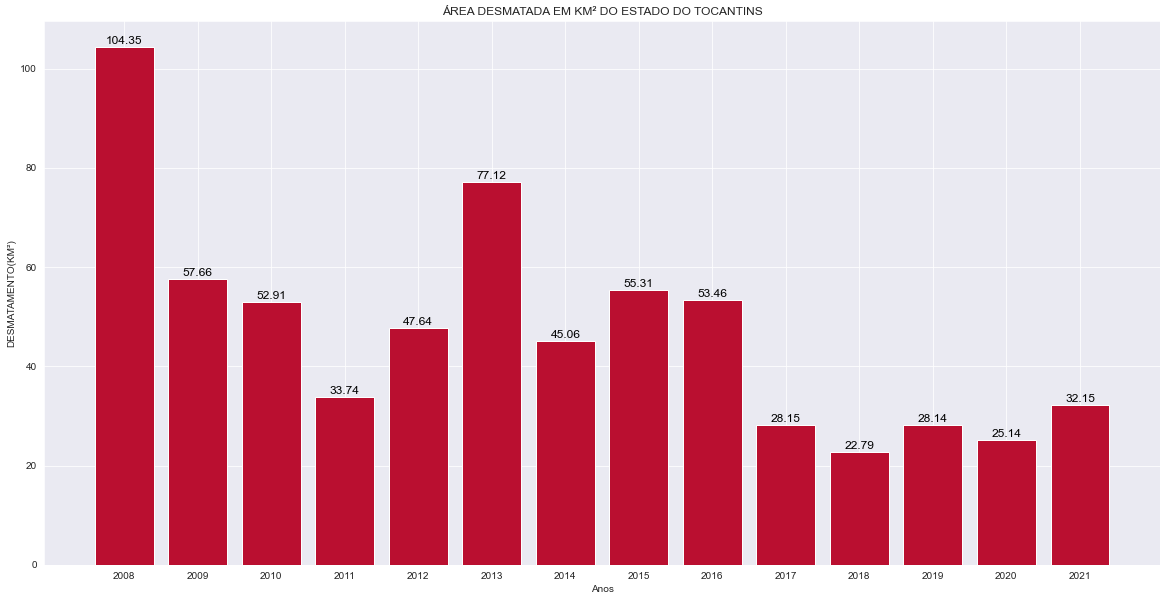

In [94]:
plot_estados(ac_df,'ACRE')
plot_estados(am_df,'AMAZONAS')
plot_estados(ap_df,'AMAPÁ')
plot_estados(ma_df,'MARANHÃO')
plot_estados(mt_df,'MATO GROSSO')
plot_estados(pa_df,'PARÁ')
plot_estados(ro_df,'RÔNDONIA')
plot_estados(rr_df,'RORAIMA')
plot_estados(to_df, 'TOCANTINS')

## Gráfico de desmatamento Total por Ano

In [43]:
amazonia_df_total = amazonia_df.groupby(pd.Grouper(key='Date', freq='Y')).sum().reset_index()

In [46]:
amazonia_df_total.drop(labels = ['julian_day','year'], axis = 'columns', inplace=True)

In [48]:
#Organizando a tabela Date para mostrar apenas os Anos
amazonia_df_total['Date'] = amazonia_df_total['Date'].dt.year

In [52]:
#Criação de uma coluna para indicar quem era o responsável pelo Governo durante os respectivos Anos
amazonia_df_total['Governo'] = ['Lula','Lula','Lula','Lula','Dilma','Dilma','Dilma','Dilma','Temer','Temer','Bolsonaro','Bolsonaro','Bolsonaro','Bolsonaro']

In [51]:
amazonia_df_total

,Date,area_km,Governo
0,2008,13318.663,Lula
1,2009,6312.410,Lula
2,2010,6296.847,Lula
3,2011,5695.139,Lula
4,2012,4430.790,Dilma
5,2013,5400.445,Dilma
6,2014,5115.743,Dilma
7,2015,6116.009,Dilma
8,2016,7268.332,Temer
9,2017,7000.191,Temer


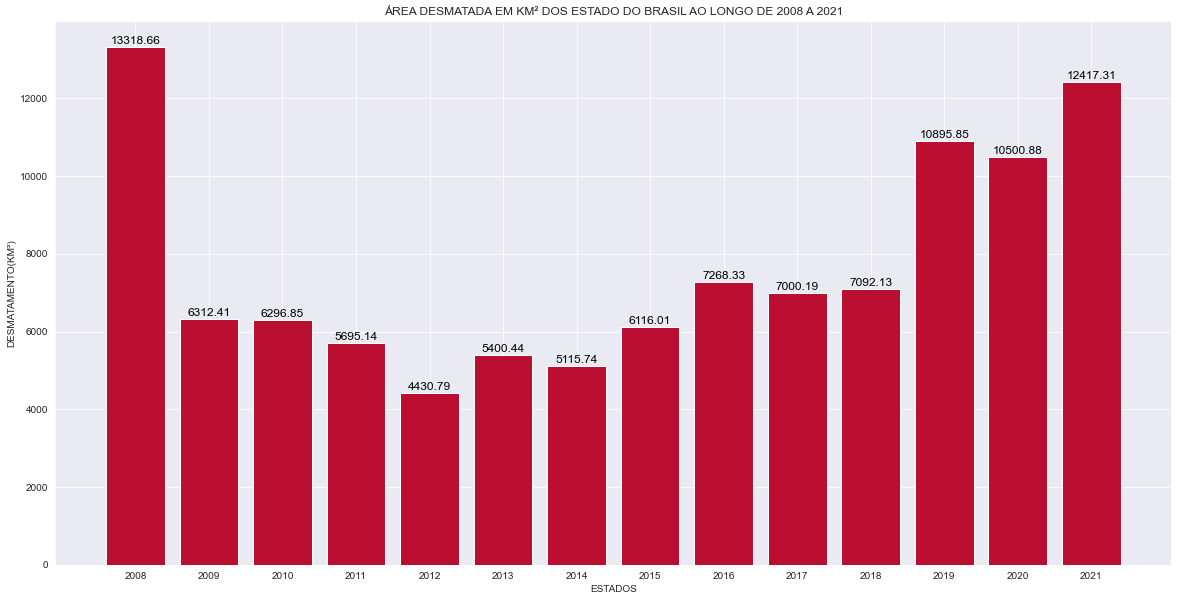

In [93]:
plt.figure(figsize=(20, 10))
plot = plt.bar(amazonia_df_total.Date,amazonia_df_total.area_km, color ='#BA0F30')
plt.xticks(amazonia_df_total.Date)
plt.title('ÁREA DESMATADA EM KM² DOS ESTADO DO BRASIL AO LONGO DE 2008 A 2021')
plt.xlabel('ESTADOS')
plt.ylabel('DESMATAMENTO(KM²)');

for i in plot.patches:
    plt.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va= 'baseline', fontsize = 12,
                color='black',xytext=(0,3),
                textcoords='offset points')

## Gráfico Total de desmatamento por ano de acordo com o Governo

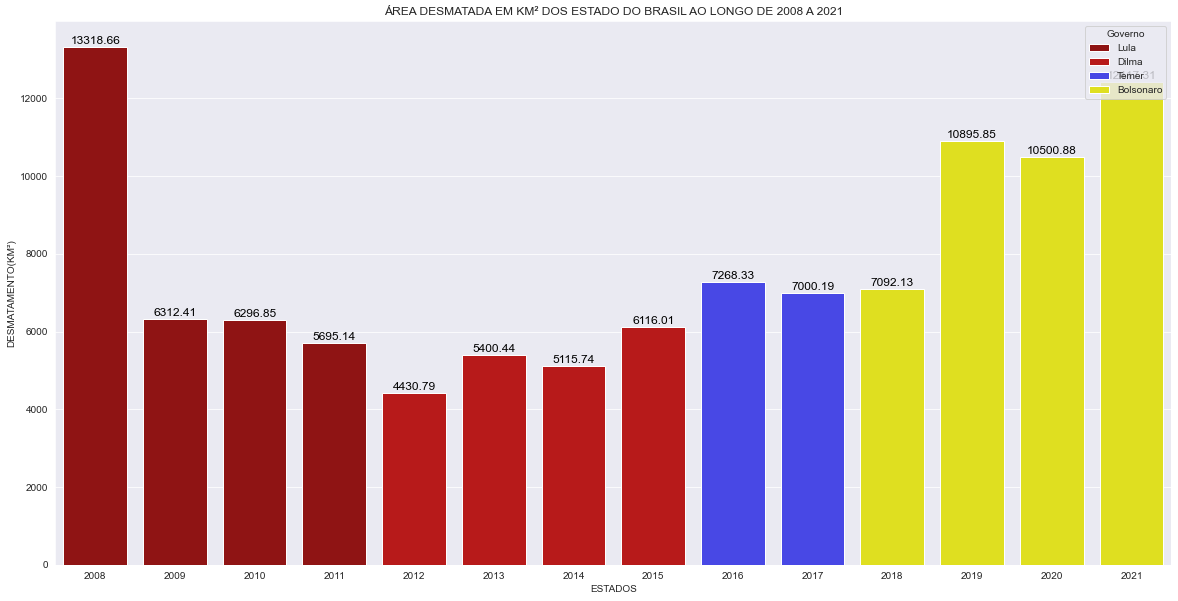

In [92]:
plt.figure(figsize=(20, 10))
plot = sns.barplot(x = amazonia_df_total.Date, y = amazonia_df_total.area_km,  
                   hue = amazonia_df_total.Governo, dodge= False , palette = ['#A30000','#D10000','#2E2EFF','Yellow'])
plt.title('ÁREA DESMATADA EM KM² DOS ESTADO DO BRASIL AO LONGO DE 2008 A 2021')
plt.xlabel('ESTADOS')
plt.ylabel('DESMATAMENTO(KM²)');

for i in plot.patches:
    plt.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va= 'baseline', fontsize = 12,
                color='black',xytext=(0,3),
                textcoords='offset points')